In [1]:
import numpy as nmp
from math import factorial
import matplotlib.pyplot as plt

plt.style.use('dark_background')

Одноканальная СМО с отказами представляет собой одну телефонную линию, на вход которой поступает простейший поток вызовов с интенсивностью X = 0,4 вызов/мин. Средняя продолжительность разговора tобсл = 3 мин; время разговора имеет показательное распределение. Найти финальные вероятности со стояний СМО: р0 и pn а также A, Q, Ротк,  Сравнить пропускную способность СМО с номинальной, которая была бы, если бы раз говор длился в точности 3 мин, а заявки шли одна за другой регулярно, без перерывов.


3-х буквенная характеристика системы: M/M/1

Количество состояний 2:
1. Все каналы свободны
2. Все каналы заняты

$$\lambda = 0.4$$

$$\mu = \dfrac{1}{t_{обсл}} = \dfrac{1}{3} $$

$$ \alpha = \dfrac{\lambda}{\mu} = 1.2 $$

Вероятности состояний можно вычислить по формулам:

$$ p_0 = \dfrac{1}{\sum \limits_{k=0}^n \dfrac{\alpha^k}{k!}} $$

$$ p_k =  \dfrac{\dfrac{\alpha^k}{k!}}{\sum \limits_{k=0}^n \dfrac{\alpha^k}{k!}}  , 0 \le k \le n $$

Используя то, что система одноканальная:

$$ p_0 = \dfrac{1}{1+ \alpha} = \dfrac{5}{11} \approx 0.4545$$

$$ p_1 = \dfrac{\alpha}{1 + \alpha} = \dfrac{6}{11} \approx 0.5454 $$

Проверим сумму вероятностей состояний ( в десятичном представлении)
$$ p_0 + p_1 = 0.9999 $$

Пропускная способность при фиксированных периодах обработки и поступления звонков:

$$ l = 2.5 * i , i \in N , l > t_{обр} $$

$$ A_ф = \dfrac{1}{l} = 0.2 $$



In [2]:
def plot_mss_simulation(t_service_gen, t_event_gen, limit=20):
    #     assume free service at 0
    #     assume event at 0
    t_event = 0
    events_x = [0]
    # event_y always 0
    t_service = t_service_gen()
    service_x = [0, 0, t_service, t_service]
    service_y = [0, 1, 1, 0]
    while t_event < limit:
        t_event += t_event_gen()
        events_x.append(t_event)
        if t_service < t_event:
            # proceed event
            service_x.append(t_event)
            service_x.append(t_event)
            service_y.append(0)
            service_y.append(1)
            t_service = t_event + t_service_gen()
            service_x.append(t_service)
            service_x.append(t_service)
            service_y.append(1)
            service_y.append(0)
        else:
            #skip event
            pass
        # break
    plt.plot(service_x, service_y, label='MSS state')
    plt.scatter(events_x, nmp.zeros(len(events_x)), color='red', label='Events')
    plt.legend()
    plt.show()


def rev_random(rev: callable) -> float:
    r = nmp.random.random()
    return rev(r)


def exp_rev_gen(speed) -> callable:
    return lambda x_i: -1 / speed * nmp.log(1 - x_i)


def calc_params(orders_speed: float, t_service: float, n: int = 1):
    alpha = orders_speed * t_service
    status_count = n + 1
    status_p = nmp.zeros(status_count)
    status_calcs = nmp.array([alpha ** k / factorial(k) for k in range(status_count)])
    status_div = status_calcs.sum()
    for i in range(status_count):
        status_p[i] = status_calcs[i] / status_div
        print(f'p_{i} = {status_p[i]:.4f}')

    p_decline = status_p[-1]
    print(f'P_decline = p_n = {p_decline:.4f}')
    q = 1 - p_decline
    print(f'Q = 1 - P_decline = {q:.4f}')
    a = orders_speed * q
    print(f'A = lambda * Q = {a:.4f}')

    ord_multiplier = 1
    while ord_multiplier / orders_speed < t_service:
        ord_multiplier += 1

    a_strict = orders_speed / ord_multiplier
    print(f'A_strict = {a_strict:.4f} (1 per {1 / a_strict:.2f} min)')

    print(f'A/A_strict * 100% = {100 * a / a_strict:.2f}%')

    if n == 1:
        plot_mss_simulation(
            lambda: 3,
            lambda: 2.5
        )

        plot_mss_simulation(
            lambda: rev_random(exp_rev_gen(1 / 3)),
            lambda: rev_random(exp_rev_gen(0.4))
        )



p_0 = 0.4545
p_1 = 0.5455
P_decline = p_n = 0.5455
Q = 1 - P_decline = 0.4545
A = lambda * Q = 0.1818
A_strict = 0.2000 (1 per 5.00 min)
A/A_strict * 100% = 90.91%


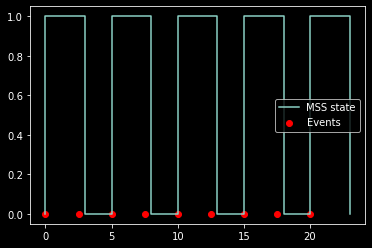

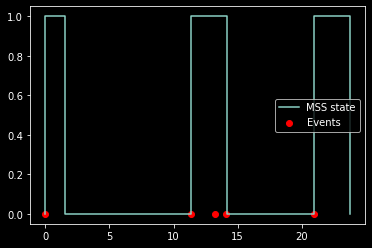

In [3]:
calc_params(
    float(input('Темп звонков')),
    float(input('Ср. вр. обслуживания')),
    int(input('Количество потоков'))
)